## 01 Basic DSP Operations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Sampling Rate = 1/0.1 = 10Hz
So theoritically can represent maximum of 10Hz frequency. But in code the wave looks a bit triangular when frequency is near to the limit.

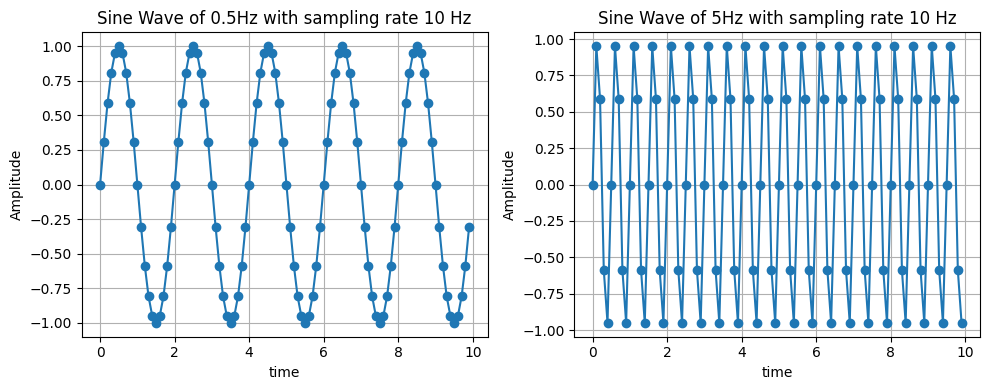

In [28]:
N = 100 #NUmber of samples
Fs1 = 10 #10 Hz sampling frequency
t = np.arange(0,10,1/Fs1)
s1 = np.sin(2*np.pi*0.5*t)
s2 = np.sin(2*np.pi*2*t)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(t,s1,marker='o')
plt.title("Sine Wave of 0.5Hz with sampling rate 10 Hz")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t,s2,marker='o')
plt.title("Sine Wave of 5Hz with sampling rate 10 Hz")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

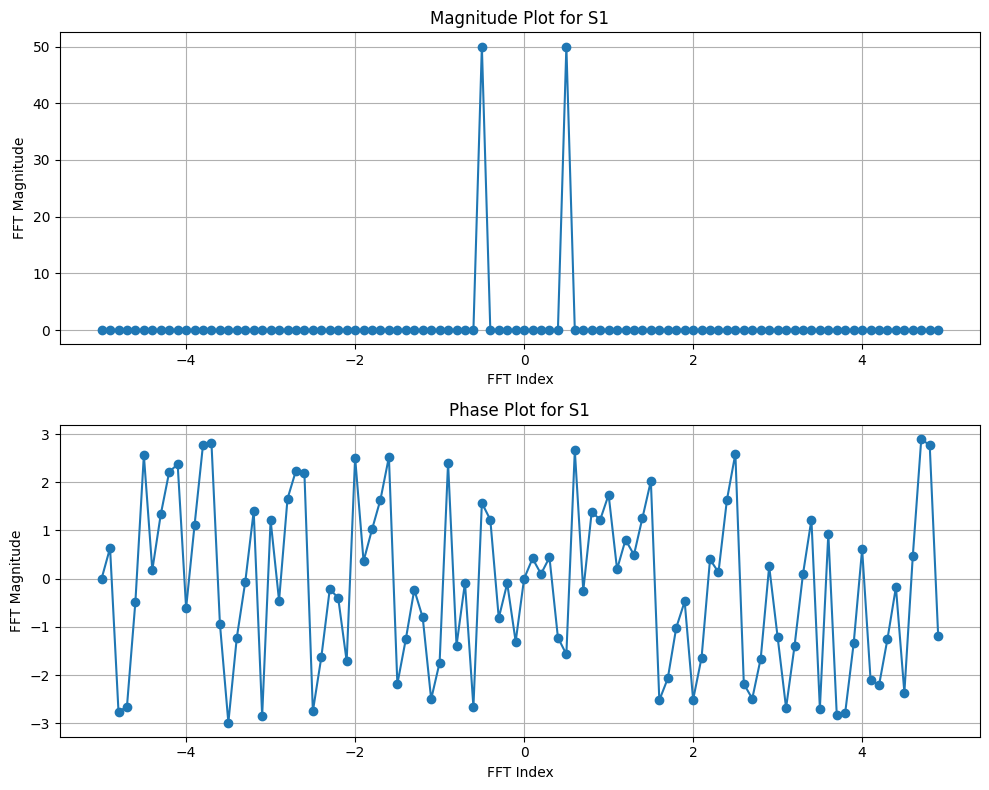

In [29]:
S1 = np.fft.fftshift(np.fft.fft(s1)) # Discrete Fourier Transform and does shifting to put 0Hz freq at center
S1_mag = np.abs(S1)
S1_phase = np.angle(S1)
f = np.arange(Fs1/-2,Fs1/2,Fs1/N)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(f,S1_mag,marker='o')
plt.title("Magnitude Plot for S1")
plt.ylabel("FFT Magnitude")
plt.xlabel("FFT Index")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f,S1_phase,marker='o')
plt.title("Phase Plot for S1")
plt.ylabel("FFT Magnitude")
plt.xlabel("FFT Index")
plt.grid(True)

plt.tight_layout()
plt.show()